0.96


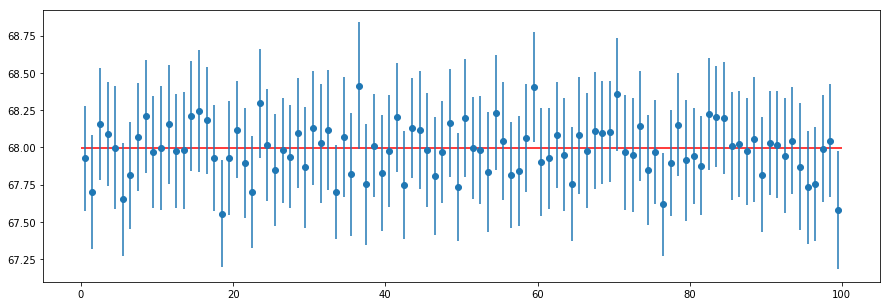

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from math import sqrt


#norm.interval takes three parameters 1->Value of (1-alpha)  2->mean of distribution from which sample came from  3->std of that distribution.  
#plt.errorbar takes a few arguments... 


ds = pd.read_csv("height-weight.csv");
pm = np.mean(ds.height);

def sampling(sampleSize, NoOfSamples):
    sampleMeans=[]
    intervals=[]
    count = 0
    
    for i in range(0, NoOfSamples):
        sample = ds.height.sample(sampleSize)
        sampleMeans.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample), np.std(sample, ddof = 1)/sqrt(sampleSize))
        intervals.append(ci)
        if(pm >= ci[0] and pm <= ci[1]):
            count = count +1
        
    print(count/NoOfSamples)
    #print(intervals)
    plt.figure(figsize = (15,5))
    plt.hlines(xmin=0, xmax=100, y=pm, color='red')
    plt.errorbar(np.arange(0.5,100,1), sampleMeans, fmt='o', yerr = [(upper-lower)/2 for lower, upper in intervals])
    
sampling(100,100)

In [ ]:
/*
Note : 
    norm.interval is used when sample size is large no matter what the population distribution is like.
    t.interval is used when sample size is small and the sample contains no outliers andits known that sample comes
    from a appox norm population.
    
    norm.interval(% CI, sample mean, sample SD/ sqrt(sample size))
    t.interval(% CI, Degrees of freedom, sample mean, sample SD/sqrt(Sample size))
